# TOXIC COMMENT CLASSIFICATION

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
all_data = pd.read_csv("D:/C-Drive Project's Datasets/toxic-comment/train.csv")
# test_comments = pd.read_csv("D:/C-Drive Project's Datasets/toxic-comment/test.csv") 
# test_labels =  pd.read_csv("D:/C-Drive Project's Datasets/toxic-comment/test_labels.csv")

# data_test = pd.merge(test_comments, test_labels, on= "id")
# all_data = pd.concat([data_train, data_test])
all_data.drop(all_data.columns[0], axis = 1, inplace = True)

In [100]:
all_data.shape

(159571, 7)

In [101]:
all_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [105]:
all_data = all_data.sample(frac=1)

In [106]:
all_data.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [107]:
print("SHAPE ", all_data.shape)
print("\n",all_data.dtypes)
all_data.isnull().sum()

SHAPE  (159571, 7)

 comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object


comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [108]:
X = all_data['comment_text']
y = all_data[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]

In [109]:
X.head()

14517                          of textbook advice, e.g. Rao
80437     for other things you can not find it in online...
107895    "\n\n Copyright problems with Image:Sw1end.JPG...
140042    "I'm pretty sure this should be ""Ron Lawruk""...
122567    "Olyeller wrote: ""finding 2+ news articles fr...
Name: comment_text, dtype: object

In [110]:
y.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
14517,0,0,0,0,0,0
80437,0,0,0,0,0,0
107895,0,0,0,0,0,0
140042,0,0,0,0,0,0
122567,0,0,0,0,0,0


### UNDERSTANDING DATA VIA VISUALIZATION

Marking comments with no toxic tags "clean"

In [111]:
rowsums = all_data.iloc[:,1:7].sum(axis=1)
rowsums[:5]

14517     0
80437     0
107895    0
140042    0
122567    0
dtype: int64

In [112]:
all_data['clean'] = np.logical_not(rowsums).astype('int')

In [113]:
all_data.iloc[:5,2:]

,severe_toxic,obscene,threat,insult,identity_hate,clean
14517,0,0,0,0,0,1
80437,0,0,0,0,0,1
107895,0,0,0,0,0,1
140042,0,0,0,0,0,1
122567,0,0,0,0,0,1


In [114]:
total_comments = len(all_data)
total_comments

159571

In [115]:
total_clean_comments = all_data['clean'].sum()
total_clean_comments

143346

In [116]:
total_tags = abs(all_data.iloc[:,2:8].sum())
total_tags

severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

In [117]:
x = all_data.iloc[:,2:].sum()

In [118]:
x.values

array([  1595,   8449,    478,   7877,   1405, 143346], dtype=int64)

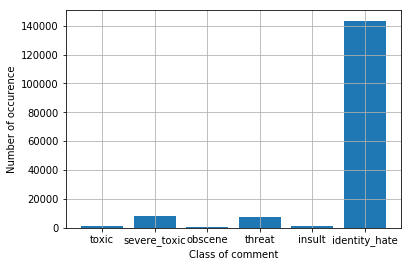

In [121]:
# COMPOSITION OF TYPES OF COMMENTS
plt.bar(y.columns, total_tags)
plt.ylabel("Number of occurence")
plt.xlabel("Class of comment")
plt.grid(True)
plt.show()

In [123]:
comment_lengths = [len(x) for x in X]
# comment_lengths

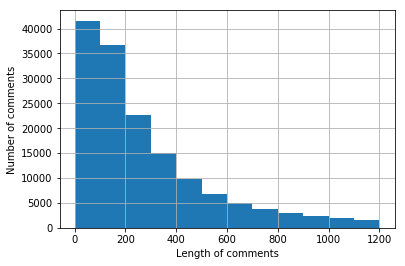

In [124]:
# AVERAGE COMMENT LENGTH
bins = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200]
plt.hist(comment_lengths, bins = bins)
plt.xlabel("Length of comments")
plt.ylabel("Number of comments")
plt.grid(True)
plt.show()

### PREPARING DATA
* Remove stop words, punctuations and special characters
* Tokenizing, stemming and lemmatising
* apply tfidf vectorization or count vectorization

In [125]:
import string
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
# string.punctuation

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bpakh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
# STOPWORDS = stopwords.words('english')
# lemmatiser = WordNetLemmatizer()
# stemmer = PorterStemmer()

In [81]:
# def text_prepare(text):
#     text = re.sub(REPLACE_BY_SPACE_RE, " ", text)
#     text = re.sub(BAD_SYMBOLS_RE, "", text) 
#     for sw in STOPWORDS:
#         text = text.replace(" "+sw+" ", " ") 
#     final_text = []
#     for word in text.split():
# #         print(word)
#         final_text.append(stemmer.stem(lemmatiser.lemmatize(word.lower())))
#     return final_text

In [82]:
# X.iloc[0]

In [83]:
# from tqdm import tqdm
# for i in tqdm(range(X.shape[0])):
#     X.iloc[i] = text_prepare(X.iloc[i])

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print("X_train shape: ", X_train.shape, "\nX_test shape: ", X_test.shape,"\nY_train shape: ", y_train.shape, "\nY_test shape: ", y_test.shape)  

X_train shape:  (111699,) 
X_test shape:  (47872,) 
Y_train shape:  (111699, 6) 
Y_test shape:  (47872, 6)


### PREPROCESSING TEXT

In [179]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
tokenized_X_train = tokenizer.texts_to_sequences(X_train)
padded_X_train = pad_sequences(tokenized_X_train, maxlen=100)

### MODEL 1
Dense Neural Network

In [183]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

from sklearn import metrics

In [188]:
padded_X_train.shape

(111699, 100)

In [196]:
# inp = Input(shape=(100, )) 
model = Sequential()
model.add(Dense(4, activation='relu', input_dim = padded_X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 404       
_________________________________________________________________
dropout_12 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 30        
Total params: 434
Trainable params: 434
Non-trainable params: 0
_________________________________________________________________


In [197]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [198]:
model.fit(padded_X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
111699/111699 [==============================] - ETA: 47:30 - loss: 1.0996 - acc: 0.90 - ETA: 3:35 - loss: 0.6646 - acc: 0.9062 - ETA: 1:49 - loss: 0.7491 - acc: 0.914 - ETA: 1:16 - loss: 0.8500 - acc: 0.914 - ETA: 57s - loss: 0.8644 - acc: 0.906 - ETA: 46s - loss: 0.8108 - acc: 0.90 - ETA: 40s - loss: 0.7917 - acc: 0.90 - ETA: 35s - loss: 0.8254 - acc: 0.90 - ETA: 31s - loss: 0.8079 - acc: 0.90 - ETA: 29s - loss: 0.7795 - acc: 0.89 - ETA: 26s - loss: 0.8177 - acc: 0.90 - ETA: 25s - loss: 0.8069 - acc: 0.90 - ETA: 23s - loss: 0.8051 - acc: 0.90 - ETA: 22s - loss: 0.8078 - acc: 0.90 - ETA: 21s - loss: 0.7890 - acc: 0.90 - ETA: 20s - loss: 0.7887 - acc: 0.90 - ETA: 20s - loss: 0.7813 - acc: 0.90 - ETA: 19s - loss: 0.7752 - acc: 0.90 - ETA: 18s - loss: 0.7905 - acc: 0.90 - ETA: 18s - loss: 0.7815 - acc: 0.91 - ETA: 17s - loss: 0.7795 - acc: 0.91 - ETA: 17s - loss: 0.7848 - acc: 0.91 - ETA: 16s - loss: 0.7718 - acc: 0.91 - ETA: 16s - loss: 0.7836 - acc: 0.91 - ETA: 15s - loss: 0

111699/111699 [==============================] - ETA: 27s - loss: 0.1216 - acc: 1.00 - ETA: 12s - loss: 0.3707 - acc: 0.98 - ETA: 11s - loss: 0.3917 - acc: 0.98 - ETA: 10s - loss: 0.3928 - acc: 0.98 - ETA: 10s - loss: 0.3930 - acc: 0.98 - ETA: 10s - loss: 0.4201 - acc: 0.98 - ETA: 10s - loss: 0.4151 - acc: 0.98 - ETA: 10s - loss: 0.4061 - acc: 0.98 - ETA: 10s - loss: 0.4015 - acc: 0.98 - ETA: 10s - loss: 0.3893 - acc: 0.98 - ETA: 10s - loss: 0.3866 - acc: 0.98 - ETA: 10s - loss: 0.3950 - acc: 0.98 - ETA: 10s - loss: 0.4089 - acc: 0.98 - ETA: 10s - loss: 0.4057 - acc: 0.98 - ETA: 9s - loss: 0.4082 - acc: 0.9864 - ETA: 9s - loss: 0.4105 - acc: 0.986 - ETA: 9s - loss: 0.4090 - acc: 0.986 - ETA: 9s - loss: 0.4081 - acc: 0.986 - ETA: 9s - loss: 0.4047 - acc: 0.986 - ETA: 9s - loss: 0.4104 - acc: 0.986 - ETA: 9s - loss: 0.4074 - acc: 0.986 - ETA: 9s - loss: 0.4002 - acc: 0.986 - ETA: 9s - loss: 0.3991 - acc: 0.986 - ETA: 9s - loss: 0.3973 - acc: 0.986 - ETA: 9s - loss: 0.4017 - acc: 0.987 - 

111699/111699 [==============================] - ETA: 24s - loss: 0.0617 - acc: 1.00 - ETA: 11s - loss: 0.4625 - acc: 0.99 - ETA: 11s - loss: 0.4272 - acc: 0.99 - ETA: 11s - loss: 0.4198 - acc: 0.99 - ETA: 10s - loss: 0.3921 - acc: 0.99 - ETA: 10s - loss: 0.3730 - acc: 0.99 - ETA: 10s - loss: 0.3834 - acc: 0.99 - ETA: 10s - loss: 0.3849 - acc: 0.99 - ETA: 10s - loss: 0.3840 - acc: 0.99 - ETA: 10s - loss: 0.3772 - acc: 0.99 - ETA: 10s - loss: 0.3699 - acc: 0.99 - ETA: 10s - loss: 0.3800 - acc: 0.99 - ETA: 10s - loss: 0.4002 - acc: 0.99 - ETA: 9s - loss: 0.4023 - acc: 0.9920 - ETA: 9s - loss: 0.4038 - acc: 0.992 - ETA: 9s - loss: 0.3955 - acc: 0.992 - ETA: 9s - loss: 0.3920 - acc: 0.992 - ETA: 9s - loss: 0.3894 - acc: 0.992 - ETA: 9s - loss: 0.3908 - acc: 0.992 - ETA: 9s - loss: 0.3957 - acc: 0.992 - ETA: 9s - loss: 0.3900 - acc: 0.992 - ETA: 9s - loss: 0.3868 - acc: 0.992 - ETA: 9s - loss: 0.3864 - acc: 0.992 - ETA: 9s - loss: 0.3873 - acc: 0.992 - ETA: 9s - loss: 0.3854 - acc: 0.992 - 

111699/111699 [==============================] - ETA: 27s - loss: 0.0000e+00 - acc: 1.00 - ETA: 11s - loss: 0.4061 - acc: 0.9896   - ETA: 10s - loss: 0.3750 - acc: 0.98 - ETA: 10s - loss: 0.3709 - acc: 0.99 - ETA: 10s - loss: 0.3659 - acc: 0.99 - ETA: 10s - loss: 0.3863 - acc: 0.99 - ETA: 10s - loss: 0.3856 - acc: 0.99 - ETA: 10s - loss: 0.4132 - acc: 0.99 - ETA: 10s - loss: 0.4097 - acc: 0.99 - ETA: 10s - loss: 0.4103 - acc: 0.99 - ETA: 9s - loss: 0.3953 - acc: 0.9947 - ETA: 9s - loss: 0.3856 - acc: 0.994 - ETA: 9s - loss: 0.3768 - acc: 0.994 - ETA: 9s - loss: 0.3688 - acc: 0.994 - ETA: 9s - loss: 0.3613 - acc: 0.993 - ETA: 9s - loss: 0.3697 - acc: 0.994 - ETA: 9s - loss: 0.3726 - acc: 0.994 - ETA: 9s - loss: 0.3656 - acc: 0.994 - ETA: 9s - loss: 0.3634 - acc: 0.994 - ETA: 9s - loss: 0.3652 - acc: 0.994 - ETA: 9s - loss: 0.3608 - acc: 0.993 - ETA: 9s - loss: 0.3611 - acc: 0.993 - ETA: 9s - loss: 0.3642 - acc: 0.993 - ETA: 9s - loss: 0.3608 - acc: 0.993 - ETA: 9s - loss: 0.3590 - acc: 

111699/111699 [==============================] - ETA: 24s - loss: 0.5065 - acc: 1.00 - ETA: 11s - loss: 0.4712 - acc: 0.99 - ETA: 11s - loss: 0.3576 - acc: 0.99 - ETA: 10s - loss: 0.3298 - acc: 0.99 - ETA: 10s - loss: 0.3203 - acc: 0.99 - ETA: 10s - loss: 0.3111 - acc: 0.99 - ETA: 10s - loss: 0.3212 - acc: 0.99 - ETA: 10s - loss: 0.3154 - acc: 0.99 - ETA: 10s - loss: 0.3208 - acc: 0.99 - ETA: 10s - loss: 0.3183 - acc: 0.99 - ETA: 10s - loss: 0.3237 - acc: 0.99 - ETA: 10s - loss: 0.3227 - acc: 0.99 - ETA: 10s - loss: 0.3174 - acc: 0.99 - ETA: 9s - loss: 0.3107 - acc: 0.9926 - ETA: 9s - loss: 0.3081 - acc: 0.992 - ETA: 9s - loss: 0.3048 - acc: 0.993 - ETA: 9s - loss: 0.3046 - acc: 0.992 - ETA: 9s - loss: 0.3044 - acc: 0.992 - ETA: 9s - loss: 0.3063 - acc: 0.992 - ETA: 9s - loss: 0.3032 - acc: 0.993 - ETA: 9s - loss: 0.3089 - acc: 0.993 - ETA: 9s - loss: 0.3129 - acc: 0.993 - ETA: 9s - loss: 0.3112 - acc: 0.993 - ETA: 9s - loss: 0.3081 - acc: 0.993 - ETA: 9s - loss: 0.3109 - acc: 0.993 - 

111699/111699 [==============================] - ETA: 24s - loss: 0.0000e+00 - acc: 1.00 - ETA: 11s - loss: 0.2891 - acc: 0.9948   - ETA: 11s - loss: 0.2790 - acc: 0.99 - ETA: 11s - loss: 0.3101 - acc: 0.99 - ETA: 11s - loss: 0.2821 - acc: 0.99 - ETA: 11s - loss: 0.2960 - acc: 0.99 - ETA: 10s - loss: 0.2906 - acc: 0.99 - ETA: 10s - loss: 0.3013 - acc: 0.99 - ETA: 10s - loss: 0.2937 - acc: 0.99 - ETA: 10s - loss: 0.3012 - acc: 0.99 - ETA: 10s - loss: 0.3018 - acc: 0.99 - ETA: 10s - loss: 0.3026 - acc: 0.99 - ETA: 10s - loss: 0.2984 - acc: 0.99 - ETA: 10s - loss: 0.3063 - acc: 0.99 - ETA: 10s - loss: 0.3119 - acc: 0.99 - ETA: 10s - loss: 0.3146 - acc: 0.99 - ETA: 10s - loss: 0.3134 - acc: 0.99 - ETA: 10s - loss: 0.3162 - acc: 0.99 - ETA: 10s - loss: 0.3130 - acc: 0.99 - ETA: 9s - loss: 0.3131 - acc: 0.9936 - ETA: 9s - loss: 0.3148 - acc: 0.993 - ETA: 9s - loss: 0.3154 - acc: 0.993 - ETA: 9s - loss: 0.3192 - acc: 0.993 - ETA: 9s - loss: 0.3191 - acc: 0.993 - ETA: 9s - loss: 0.3237 - acc: 

111699/111699 [==============================] - ETA: 27s - loss: 0.2819 - acc: 1.00 - ETA: 12s - loss: 0.2390 - acc: 0.99 - ETA: 11s - loss: 0.2844 - acc: 0.99 - ETA: 11s - loss: 0.3011 - acc: 0.99 - ETA: 11s - loss: 0.3143 - acc: 0.99 - ETA: 10s - loss: 0.3124 - acc: 0.99 - ETA: 10s - loss: 0.3186 - acc: 0.99 - ETA: 10s - loss: 0.3163 - acc: 0.99 - ETA: 10s - loss: 0.3142 - acc: 0.99 - ETA: 10s - loss: 0.3168 - acc: 0.99 - ETA: 10s - loss: 0.3095 - acc: 0.99 - ETA: 10s - loss: 0.3069 - acc: 0.99 - ETA: 10s - loss: 0.3029 - acc: 0.99 - ETA: 10s - loss: 0.3069 - acc: 0.99 - ETA: 10s - loss: 0.3124 - acc: 0.99 - ETA: 10s - loss: 0.3103 - acc: 0.99 - ETA: 10s - loss: 0.3107 - acc: 0.99 - ETA: 10s - loss: 0.3111 - acc: 0.99 - ETA: 10s - loss: 0.3089 - acc: 0.99 - ETA: 9s - loss: 0.3054 - acc: 0.9937 - ETA: 9s - loss: 0.3033 - acc: 0.993 - ETA: 9s - loss: 0.3049 - acc: 0.993 - ETA: 9s - loss: 0.3041 - acc: 0.993 - ETA: 9s - loss: 0.3080 - acc: 0.993 - ETA: 9s - loss: 0.3064 - acc: 0.993 - 

111699/111699 [==============================] - ETA: 31s - loss: 0.2409 - acc: 1.00 - ETA: 12s - loss: 0.2966 - acc: 0.99 - ETA: 11s - loss: 0.2749 - acc: 0.99 - ETA: 11s - loss: 0.2871 - acc: 0.99 - ETA: 11s - loss: 0.2769 - acc: 0.99 - ETA: 11s - loss: 0.2929 - acc: 0.99 - ETA: 11s - loss: 0.3089 - acc: 0.99 - ETA: 11s - loss: 0.3127 - acc: 0.99 - ETA: 11s - loss: 0.3189 - acc: 0.99 - ETA: 11s - loss: 0.3198 - acc: 0.99 - ETA: 10s - loss: 0.3098 - acc: 0.99 - ETA: 10s - loss: 0.3076 - acc: 0.99 - ETA: 10s - loss: 0.3114 - acc: 0.99 - ETA: 10s - loss: 0.3085 - acc: 0.99 - ETA: 10s - loss: 0.3090 - acc: 0.99 - ETA: 10s - loss: 0.3077 - acc: 0.99 - ETA: 10s - loss: 0.3168 - acc: 0.99 - ETA: 10s - loss: 0.3187 - acc: 0.99 - ETA: 10s - loss: 0.3219 - acc: 0.99 - ETA: 10s - loss: 0.3220 - acc: 0.99 - ETA: 10s - loss: 0.3202 - acc: 0.99 - ETA: 10s - loss: 0.3162 - acc: 0.99 - ETA: 10s - loss: 0.3115 - acc: 0.99 - ETA: 10s - loss: 0.3139 - acc: 0.99 - ETA: 10s - loss: 0.3158 - acc: 0.99 - E

111699/111699 [==============================] - ETA: 27s - loss: 0.1660 - acc: 1.00 - ETA: 12s - loss: 0.2364 - acc: 0.99 - ETA: 11s - loss: 0.2702 - acc: 0.99 - ETA: 11s - loss: 0.2938 - acc: 0.99 - ETA: 10s - loss: 0.2901 - acc: 0.99 - ETA: 10s - loss: 0.2929 - acc: 0.99 - ETA: 10s - loss: 0.2991 - acc: 0.99 - ETA: 10s - loss: 0.3041 - acc: 0.99 - ETA: 10s - loss: 0.3038 - acc: 0.99 - ETA: 10s - loss: 0.3062 - acc: 0.99 - ETA: 10s - loss: 0.3048 - acc: 0.99 - ETA: 9s - loss: 0.3051 - acc: 0.9954 - ETA: 9s - loss: 0.2967 - acc: 0.995 - ETA: 9s - loss: 0.2992 - acc: 0.995 - ETA: 9s - loss: 0.2979 - acc: 0.995 - ETA: 9s - loss: 0.2935 - acc: 0.995 - ETA: 9s - loss: 0.2890 - acc: 0.995 - ETA: 9s - loss: 0.2876 - acc: 0.995 - ETA: 9s - loss: 0.2883 - acc: 0.995 - ETA: 9s - loss: 0.2901 - acc: 0.995 - ETA: 9s - loss: 0.2900 - acc: 0.995 - ETA: 9s - loss: 0.2901 - acc: 0.995 - ETA: 9s - loss: 0.2914 - acc: 0.995 - ETA: 9s - loss: 0.2910 - acc: 0.995 - ETA: 9s - loss: 0.2899 - acc: 0.995 - 

111699/111699 [==============================] - ETA: 27s - loss: 0.2958 - acc: 1.00 - ETA: 12s - loss: 0.2798 - acc: 0.99 - ETA: 11s - loss: 0.3155 - acc: 0.99 - ETA: 11s - loss: 0.3002 - acc: 0.99 - ETA: 11s - loss: 0.3101 - acc: 0.99 - ETA: 11s - loss: 0.3090 - acc: 0.99 - ETA: 10s - loss: 0.3054 - acc: 0.99 - ETA: 10s - loss: 0.3017 - acc: 0.99 - ETA: 10s - loss: 0.3027 - acc: 0.99 - ETA: 10s - loss: 0.3095 - acc: 0.99 - ETA: 10s - loss: 0.3106 - acc: 0.99 - ETA: 10s - loss: 0.3102 - acc: 0.99 - ETA: 10s - loss: 0.3072 - acc: 0.99 - ETA: 10s - loss: 0.3036 - acc: 0.99 - ETA: 10s - loss: 0.3036 - acc: 0.99 - ETA: 10s - loss: 0.3063 - acc: 0.99 - ETA: 10s - loss: 0.3120 - acc: 0.99 - ETA: 10s - loss: 0.3077 - acc: 0.99 - ETA: 10s - loss: 0.3070 - acc: 0.99 - ETA: 10s - loss: 0.3084 - acc: 0.99 - ETA: 9s - loss: 0.3079 - acc: 0.9945 - ETA: 9s - loss: 0.3057 - acc: 0.994 - ETA: 9s - loss: 0.3072 - acc: 0.994 - ETA: 9s - loss: 0.3102 - acc: 0.994 - ETA: 9s - loss: 0.3059 - acc: 0.994 - 

In [199]:
model.save('./model_weights/model_denseNN.h5')

In [200]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_test))
tokenized_X_test = tokenizer.texts_to_sequences(X_test)
padded_X_test = pad_sequences(tokenized_X_test, maxlen=100)
score = model.evaluate(padded_X_test, y_test, batch_size=batch_size, verbose = False)

In [201]:
print(" [LOSS,                          ACCURACY]\n",score)

 [LOSS,                          ACCURACY]
 [0.30200029146623486, 0.9935452892260755]


### MODEL 2
LSTM Model

In [166]:
inp = Input(shape=(100, )) 
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(100, return_sequences=True,name='lstm_layer1')(x)
x = LSTM(80, return_sequences=True,name='lstm_layer2')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(80, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 100, 100)          91600     
_________________________________________________________________
lstm_layer2 (LSTM)           (None, 100, 80)           57920     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 80)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 80)                6480      
__________

In [167]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [168]:
batch_size = 2000
epochs = 10
model.fit(padded_X_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 100529 samples, validate on 11170 samples
Epoch 1/10
100529/100529 [==============================] - ETA: 1:55 - loss: 0.6944 - acc: 0.499 - ETA: 1:08 - loss: 0.6921 - acc: 0.590 - ETA: 52s - loss: 0.6899 - acc: 0.666 - ETA: 44s - loss: 0.6874 - acc: 0.72 - ETA: 39s - loss: 0.6843 - acc: 0.76 - ETA: 35s - loss: 0.6807 - acc: 0.79 - ETA: 33s - loss: 0.6761 - acc: 0.81 - ETA: 30s - loss: 0.6704 - acc: 0.83 - ETA: 29s - loss: 0.6628 - acc: 0.84 - ETA: 27s - loss: 0.6528 - acc: 0.85 - ETA: 26s - loss: 0.6405 - acc: 0.86 - ETA: 25s - loss: 0.6250 - acc: 0.87 - ETA: 24s - loss: 0.6070 - acc: 0.87 - ETA: 23s - loss: 0.5873 - acc: 0.88 - ETA: 22s - loss: 0.5676 - acc: 0.89 - ETA: 21s - loss: 0.5485 - acc: 0.89 - ETA: 20s - loss: 0.5292 - acc: 0.89 - ETA: 19s - loss: 0.5119 - acc: 0.90 - ETA: 18s - loss: 0.4953 - acc: 0.90 - ETA: 18s - loss: 0.4802 - acc: 0.90 - ETA: 17s - loss: 0.4655 - acc: 0.91 - ETA: 16s - loss: 0.4523 - acc: 0.91 - ETA: 15s - loss: 0.4401 - acc: 0.91 - ETA: 15s -

Epoch 5/10
100529/100529 [==============================] - ETA: 24s - loss: 0.1435 - acc: 0.96 - ETA: 24s - loss: 0.1483 - acc: 0.96 - ETA: 24s - loss: 0.1434 - acc: 0.96 - ETA: 23s - loss: 0.1437 - acc: 0.96 - ETA: 23s - loss: 0.1425 - acc: 0.96 - ETA: 22s - loss: 0.1425 - acc: 0.96 - ETA: 22s - loss: 0.1402 - acc: 0.96 - ETA: 21s - loss: 0.1400 - acc: 0.96 - ETA: 21s - loss: 0.1409 - acc: 0.96 - ETA: 20s - loss: 0.1428 - acc: 0.96 - ETA: 20s - loss: 0.1418 - acc: 0.96 - ETA: 19s - loss: 0.1423 - acc: 0.96 - ETA: 19s - loss: 0.1423 - acc: 0.96 - ETA: 18s - loss: 0.1426 - acc: 0.96 - ETA: 18s - loss: 0.1434 - acc: 0.96 - ETA: 17s - loss: 0.1429 - acc: 0.96 - ETA: 17s - loss: 0.1435 - acc: 0.96 - ETA: 16s - loss: 0.1434 - acc: 0.96 - ETA: 16s - loss: 0.1443 - acc: 0.96 - ETA: 15s - loss: 0.1444 - acc: 0.96 - ETA: 15s - loss: 0.1439 - acc: 0.96 - ETA: 14s - loss: 0.1441 - acc: 0.96 - ETA: 14s - loss: 0.1444 - acc: 0.96 - ETA: 13s - loss: 0.1442 - acc: 0.96 - ETA: 13s - loss: 0.1432 - ac

In [169]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_test))
tokenized_X_test = tokenizer.texts_to_sequences(X_test)
padded_X_test = pad_sequences(tokenized_X_test, maxlen=100)
score = model.evaluate(padded_X_test, y_test, batch_size=batch_size, verbose = False)

In [170]:
score = model.evaluate(padded_X_test, y_test, batch_size=batch_size, verbose = False)

In [175]:
# model.save('./model_weights/model_LSTM1.h5')

In [176]:
print(" [LOSS,                          ACCURACY]\n",score)

 [LOSS,                          ACCURACY]
 [0.16114958715849223, 0.9626921933084567]


In [208]:
y_train.shape

(111699, 6)

In [209]:
padded_X_train.shape

(111699, 100)